In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_files('alexattia/the-simpsons-characters-dataset', path='./input', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset


In [8]:
import splitfolders

input_dir = './input/simpsons_dataset'
output_dir = './data'

splitfolders.ratio(input_dir, output_dir, ratio=(0.9, 0.1))

Copying files: 20933 files [00:31, 665.30 files/s]


In [9]:
train_dir = './data/train'
val_dir = './data/val'
test_dir = './data/test'

image_size = (64, 64, 3)
epochs = 50
batch = 100

In [10]:
import os

labels = os.listdir(train_dir)

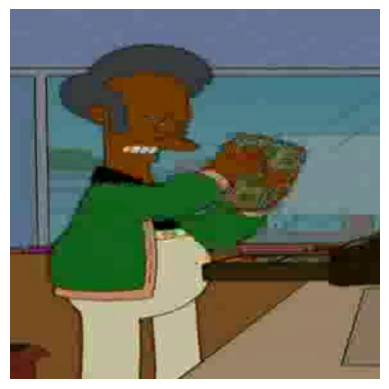

In [22]:
import cv2
import matplotlib.pyplot as plt

image_name = train_dir + "/apu_nahasapeemapetilon/pic_0123.jpg"

def plot_img(image_location):
    image = cv2.imread(image_location)
    image = cv2.resize(image, (512, 512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return

plot_img(image_name)


In [31]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [32]:
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size[:2],
    batch_size = batch,
    class_mode='categorical',
    color_mode='rgb'
)

val_set = test_datagen.flow_from_directory(
    val_dir,
    target_size = image_size[:2],
    batch_size = batch,
    class_mode = 'categorical',
    color_mode = 'rgb'
)

Found 18820 images belonging to 43 classes.
Found 2113 images belonging to 43 classes.


In [35]:
for data_batch, labels_batch in training_set:
    print(data_batch.shape)
    break

(100, 64, 64, 3)


In [37]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=image_size, activation="relu"))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

c:\Users\drewe\Documents\learning\simpsons-cv\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     9,438,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        44,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,285,643 (39.24 MB)

 Trainable params: 10,285,643 (39.24 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = './model.h5.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

callbacks = [
    EarlyStopping(patience = 5, monitor = 'val_accuracy', mode='max'),
    model_checkpoint_callback
]

In [ ]:
model.fit(
    training_set,
    epochs = epochs,
    validation_data = val_set,
    callbacks = callbacks
)